# Laboratorio 8

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 

%matplotlib inline

In [14]:
digits_X, digits_y = datasets.load_digits(return_X_y=True, as_frame=True)
digits = pd.concat([digits_X, digits_y], axis=1)
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Ejercicio 1

(1 pto.)

Utilizando todos los datos, ajusta un modelo de regresión logística a los datos de dígitos. No agregues intercepto y define un máximo de iteraciones de 400.

Obtén el _score_ y explica el tan buen resultado.

In [15]:
logistic = LogisticRegression(fit_intercept=False)
logistic.max_iter=400
logistic.fit(digits_X, digits_y)

print(f"El score del modelo de regresión logística es {logistic.score(digits_X, digits_y)}")

El score del modelo de regresión logística es 1.0


__Respuesta:__ Suficientes iteraciones, y la regresion logistica se va a aprender de memoria cada una de las imagenes, sin mucho hincapie en los numeros distintos a los testeos que se ocupo. Por eso no se prueba la regresion con los mismos numeros de testeo que se emplean. 

## Ejercicio 2

(1 pto.)

Utilizando todos los datos, ¿Cuál es la mejor elección del parámetro $k$ al ajustar un modelo kNN a los datos de dígitos? Utiliza valores $k=2, ..., 10$.

In [16]:
for k in range(2, 11):
    kNN=KNeighborsClassifier(k)
    kNN.fit(digits_X, digits_y)
    print(f"El score del modelo de kNN con k={k} es {kNN.score(digits_X, digits_y)}")

El score del modelo de kNN con k=2 es 0.9910962715637173
El score del modelo de kNN con k=3 es 0.993322203672788
El score del modelo de kNN con k=4 es 0.9922092376182526
El score del modelo de kNN con k=5 es 0.9905397885364496
El score del modelo de kNN con k=6 es 0.989983305509182
El score del modelo de kNN con k=7 es 0.9905397885364496
El score del modelo de kNN con k=8 es 0.9894268224819143
El score del modelo de kNN con k=9 es 0.9888703394546466
El score del modelo de kNN con k=10 es 0.9855314412910406


__Respuesta:__ Todos son muy buenos, pero al parecer el mejor valor es k=3 por el score.

## Ejercicio 3

(1 pto.)

Grafica la matriz de confusión normalizada por predicción de ambos modelos (regresión logística y kNN con la mejor elección de $k$).

¿Qué conclusión puedes sacar?

Hint: Revisa el argumento `normalize` de la matriz de confusión.

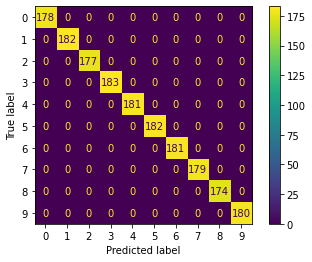

In [24]:
plot_confusion_matrix(logistic, digits_X, digits_y);

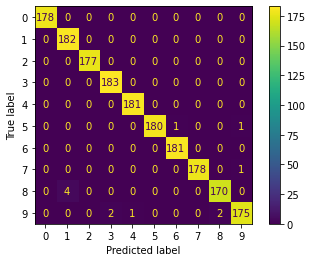

In [25]:
best_knn = KNeighborsClassifier(3)
best_knn.fit(digits_X, digits_y)
plot_confusion_matrix(best_knn, digits_X, digits_y);

__Respuesta:__ # FIX ME #

## Ejercicio 4

(1 pto.)

Escoge algún registro donde kNN se haya equivocado, _plotea_ la imagen y comenta las razones por las que el algoritmo se pudo haber equivocado.

In [29]:
digits_y[digits_y-best_knn.predict(digits_X)!=0]

5       5
69      9
129     8
480     7
547     9
794     8
813     9
1100    9
1361    5
1553    8
1658    9
1790    8
Name: target, dtype: int64

El valor real del registro seleccionado es

In [30]:
i = 5
digits_y[i]

5

Mentras que la predicción dada por kNN es

In [31]:
best_knn.predict(digits_X)[5]

9

A continuación la imagen

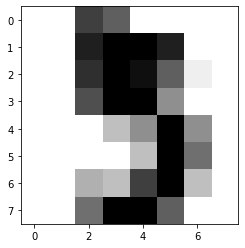

In [32]:
plt.imshow(digits_X.loc[[i], :].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest');

__Respuesta:__ Es ambiguo cual es el valor del numero, y de hecho, calza mejor con un nueve que con un 5. Como el nuemero esta mejor sobrepuesto sobre el 9 que el 5, el algoritmo que solo depende de vecindades cercanas lo clasificara como 9 en vez de 5.